In [12]:
import torch
import torchvision
import torchvision.transforms as transforms
import  matplotlib.pyplot as plt
import numpy as np

import torch.nn  as nn
import torch.nn.functional as F

In [20]:
%matplotlib inline

In [21]:
#from https://github.com/pytorch/examples/blob/master/mnist/main.py
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


In [22]:
model = torch.load('mnist_model.pt')

In [23]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = [i for i in range(10)]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
    0     5     7     7


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x1275ae400>>
Traceback (most recent call last):
  File "/Users/silver/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/Users/silver/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/Users/silver/anaconda3/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/Users/silver/anaconda3/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 86, in rebuild_storage_filename
    storage = cls._new_shared_filename(manager, handle, size)
RuntimeError: Interrupted system call at /Users/soumith/minicondabuild3/conda-bld/pytorch_1524590658547/work/torch/lib/libshm/core.cpp:125


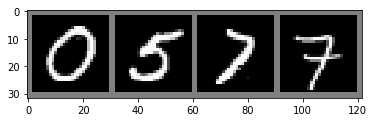

In [77]:
def imshow(img):
    print(type(img))
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(type(images))

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [78]:
saved_images = images

<class 'torch.Tensor'>


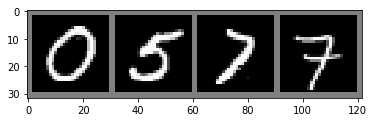

In [79]:
imshow(torchvision.utils.make_grid(saved_images))

In [83]:
model(saved_images)

tensor([[-8.4819e-05, -3.8154e+01, -1.0609e+01, -1.5884e+01, -2.6188e+01,
         -2.8851e+01, -2.6488e+01, -1.0509e+01, -1.1485e+01, -1.0705e+01],
        [-3.8396e+01, -4.1535e+01, -4.0702e+01, -1.6304e+01, -5.8333e+01,
         -8.3039e-08, -3.6559e+01, -3.0839e+01, -3.8118e+01, -3.2363e+01],
        [-3.8498e+01, -2.2811e+01, -1.8645e+01, -3.0013e+01, -2.3061e+01,
         -4.5677e+01, -5.0407e+01, -8.2114e-09, -3.0583e+01, -3.3781e+01],
        [-2.8567e+01, -1.4594e+01, -1.1676e+01, -1.5509e+01, -3.2040e+00,
         -2.3668e+01, -2.3683e+01, -4.1462e-02, -1.4039e+01, -1.2390e+01]])